<a href="https://colab.research.google.com/github/mhdykz/Implementation-of-artificial-intelligence-with-Tensorflow/blob/main/tensor_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [41]:
import numpy as np
import h5py
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Input , Flatten , Dropout , LeakyReLU
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


In [42]:
def load_data():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # Training features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # Training labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])   # Test features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])   # Test labels

    train_set_y_orig = train_set_y_orig.reshape((train_set_y_orig.shape[0], 1))
    test_set_y_orig = test_set_y_orig.reshape((test_set_y_orig.shape[0], 1))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig

train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig = load_data()

In [43]:
x_train = train_set_x_orig.astype("float32") / 255
x_test = test_set_x_orig.astype("float32") / 255

y_train = train_set_y_orig
y_test = test_set_y_orig

In [44]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)

In [45]:
model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='tanh', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='tanh'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='tanh'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(512, activation='tanh'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
)


In [46]:
optimizer = Adam(learning_rate=0.000001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-6)

In [48]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=200,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, lr_reduction],
                    verbose=1)


Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 251ms/step - accuracy: 0.3491 - loss: 0.7579 - val_accuracy: 0.7000 - val_loss: 0.6572 - learning_rate: 1.0000e-06
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 0.4179 - loss: 0.7249 - val_accuracy: 0.6000 - val_loss: 0.6680 - learning_rate: 1.0000e-06
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.3982 - loss: 0.7132 - val_accuracy: 0.5800 - val_loss: 0.6799 - learning_rate: 1.0000e-06
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 348ms/step - accuracy: 0.4950 - loss: 0.6980 - val_accuracy: 0.4800 - val_loss: 0.6922 - learning_rate: 1.0000e-06
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - accuracy: 0.4717 - loss: 0.6993 - val_accuracy: 0.4200 - val_loss: 0.7044 - learning_rate: 1.0000e-06
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - accuracy: 0.5543 - loss: 0.6874 - val_accuracy: 0.4000 - val_loss: 0.7164 - learning_rate: 1.0000e-06
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - accuracy: 0.6708 

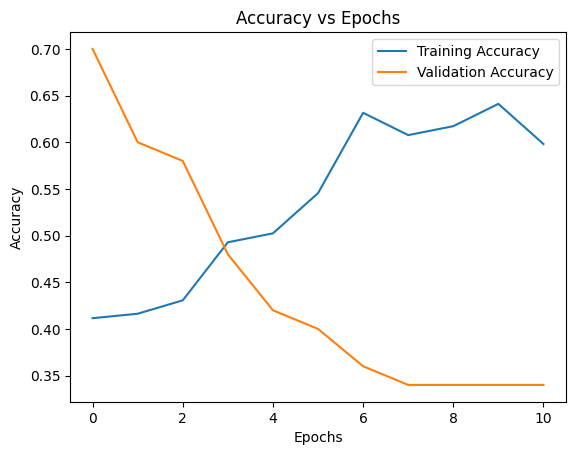

In [49]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


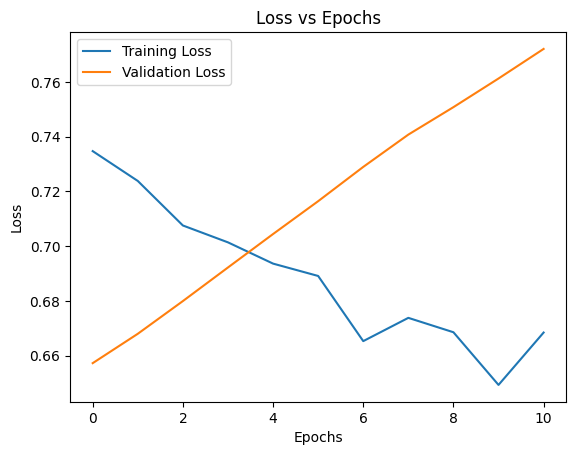

In [50]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7375 - loss: 0.6505
Test Accuracy: 70.00%
